In [ ]:
'''OS.walk() generate the file names in a directory tree by walking the tree either top-down or bottom-up. 
For each directory in the tree rooted at directory top (including top itself), 
it yields a 3-tuple (dirpath, dirnames, filenames).

root : Prints out directories only from what you specified.
dirs : Prints out sub-directories from root.
files : Prints out all files from root and directories.
'''

import pandas as pd

import os
for dirname, _, filenames in os.walk('D:\Dataset\Dog and Cat Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

https://www.kaggle.com/jonnyjackk/image-classification-with-cnn-92-42-accuracy

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import os
import tensorflow.keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from zipfile import ZipFile


In [ ]:
from zipfile import ZipFile

ZipFile("D:\Dataset\Dog and Cat Dataset/train.zip","r").extractall()
ZipFile("D:\Dataset\Dog and Cat Dataset/test1.zip", "r").extractall()


In [ ]:
train_path = "./train"
test_path = "./test1"

In [ ]:
# Get images of dogs and cats
'''
os.listdir() method in python is used to get the list of all files and directories in the specified directory.
If we don’t specify any directory, then list of files and directories in the current working directory will be returned.
'''

file_names = os.listdir(train_path)
categories = []

for path in file_names:
    
    animal_type = path.split('.')[0]
    
    categories.append(animal_type)

In [ ]:
df= pd.DataFrame({'Image': file_names, 'Animal': categories})
df.sample(5)

In [10]:
# df.to_excel('DataSet_CatandDOg.xlsx')

In [11]:
#Split Data

In [12]:
df_train, df_valid = train_test_split(df, test_size=0.2, random_state=42)

df_train.reset_index(drop=True, inplace=True)
df_valid.reset_index(drop=True, inplace=True)

print(df_train.shape)
print(df_valid.shape)

(20000, 2)
(5000, 2)


In [13]:
df_train

,Image,Animal
0,dog.8479.jpg,dog
1,dog.876.jpg,dog
2,cat.10915.jpg,cat
3,dog.10127.jpg,dog
4,cat.11377.jpg,cat
...,...,...
19995,dog.6916.jpg,dog
19996,cat.36.jpg,cat
19997,cat.10771.jpg,cat
19998,dog.1713.jpg,dog


# Augmentation of images

In [14]:


'''
Image data augmentation is a technique that can be used to artificially expand the size of a training dataset by 
creating modified versions of images in the dataset.
Training deep learning neural network models on more data can result in more skillful models, and 
the augmentation techniques can create variations of the images that can improve the ability of the fit models
to generalize what they have learned to new images
'''

'''Image data augmentation is used to expand the training dataset in order to improve the performance and 
ability of the model to generalize.

Image data augmentation is supported in the Keras deep learning library via the ImageDataGenerator class.

How to use shift, flip, brightness, and zoom image data augmentation.
'''

print('image Augmentation')

image Augmentation


In [15]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

In [16]:
# import tensorflow as tf
tf.__version__

'2.6.0'

# import tensorflow.keras 

In [17]:

import tensorflow.keras 

from tensorflow.keras.preprocessing.image import ImageDataGenerator
'''
Image shifts via the width_shift_range and height_shift_range arguments.
Image flips via the horizontal_flip and vertical_flip arguments.
Image rotations via the rotation_range argument
Image brightness via the brightness_range argument.
Image zoom via the zoom_range argument.
'''
# Augment training data
datagen_train = ImageDataGenerator(rescale=1./255, rotation_range=30,
                              width_shift_range=0.1, height_shift_range=0.1,
                              shear_range=0.2, zoom_range=0.2,
                              horizontal_flip=True, fill_mode='nearest')

# Augment validating data
datagen_valid = ImageDataGenerator(rescale=1./255)


aug_train = datagen_train.flow_from_dataframe(df_train, directory=train_path, 
                                             x_col='Image', y_col='Animal',
                                             color_mode="grayscale",target_size=(124, 124), class_mode='binary',batch_size=32)

aug_valid = datagen_valid.flow_from_dataframe(df_valid, directory=train_path,
                                             x_col='Image', y_col='Animal',
                                             color_mode="grayscale",target_size=(124, 124), class_mode='binary',batch_size=32)

'''
2
3
...
# create data generator
datagen = ImageDataGenerator()
an iterator can be created for an image dataset located on disk in a specified 
directory, where images in that directory are organized into subdirectories according to their class.


3
...
# create iterator
it = datagen.flow_from_directory(dataset,x_col='',y_col='',target_size=(224,224))
you can pass input and target both or whole like in the above
it = datagen.flow_from_directory(X, y, ...)
Alternately, an iterator can be created for an image dataset located on disk in a specified directory,
where images in that directory are organized into subdirectories according to their class.

3
...
# create iterator
it = datagen.flow_from_directory(X, y, ...)


# define model
model = ...
# fit model on the augmented dataset
model.fit_generator(it, steps_per_epoch=313, ...)

'''

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


"\n2\n3\n...\n# create data generator\ndatagen = ImageDataGenerator()\nan iterator can be created for an image dataset located on disk in a specified \ndirectory, where images in that directory are organized into subdirectories according to their class.\n\n\n3\n...\n# create iterator\nit = datagen.flow_from_directory(dataset,x_col='',y_col='',target_size=(224,224))\nyou can pass input and target both or whole like in the above\nit = datagen.flow_from_directory(X, y, ...)\nAlternately, an iterator can be created for an image dataset located on disk in a specified directory,\nwhere images in that directory are organized into subdirectories according to their class.\n\n3\n...\n# create iterator\nit = datagen.flow_from_directory(X, y, ...)\n\n\n# define model\nmodel = ...\n# fit model on the augmented dataset\nmodel.fit_generator(it, steps_per_epoch=313, ...)\n\n"

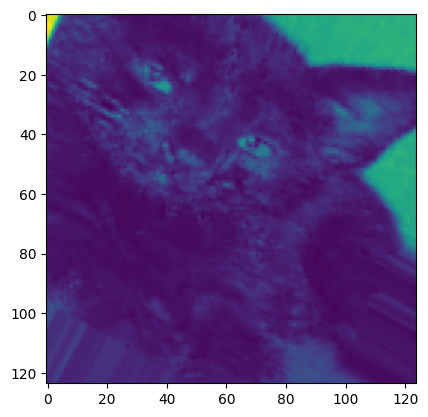

In [15]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(aug_train[0][0][0])
# plt.title(class_names[train_y[0]])
# plt.colorbar()
plt.grid(False)
plt.show()

In [16]:
(aug_train[0][0]).shape

(32, 124, 124, 1)

# ModEl Checkpoint

In [29]:
'''
ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights 
(in a checkpoint file) at some interval, so the model or weights can be loaded later to continue the 
training from the state saved.


Whether to only keep the model that has achieved the "best performance" so far, or whether to save the model at the end of every epoch regardless of performance.
Definition of 'best'; which quantity to monitor and whether it should be maximized or minimized.
The frequency it should save at. Currently, the callback supports saving at the end of every epoch, or after a fixed number of training batches.
Whether only weights are saved, or the whole model is saved.

tf.keras.callbacks.ModelCheckpoint(
    filepath,
    monitor="val_loss",
    verbose=0,
    save_best_only=False,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch",
    options=None,
    **kwargs
)
'''
import tensorflow.keras 
# from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

from tensorflow.keras.preprocessing.image import img_to_array, load_img

#https://keras.io/api/callbacks/model_checkpoint/
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_acc', verbose=1,
                           save_best_only=True, mode='max')

'''
EarlyStopping 

Stop training when a monitored metric has stopped improving.

tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",Quantity to be monitored.
    min_delta=0,Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.
    patience=0, patience: Number of epochs with no improvement after which training will be stopped.
    verbose=0,
    mode="auto",One of {"auto", "min", "max"}. In min mode, training will stop when the quantity monitored has stopped decreasing; in "max" mode it will stop when the quantity monitored has stopped increasing; in "auto" mode, the direction is automatically inferred from the name of the monitored quantity.
    baseline=None,Baseline value for the monitored quantity. Training will stop if the model doesn't show improvement over the baseline.
    restore_best_weights=False,
)
'''
es = EarlyStopping(monitor='val_acc', mode='max', patience=9, verbose=1)

'''
Reduce learning rate when a metric has stopped improving.

tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,factor by which the learning rate will be reduced. new_lr = lr * factor.
    patience=10,number of epochs with no improvement after which learning rate will be reduced.
    verbose=0,
    mode="auto",
    min_delta=0.0001,threshold for measuring the new optimum, to only focus on significant changes.
    cooldown=0,number of epochs to wait before resuming normal operation after lr has been reduced.
    min_lr=0, lower bound on the learning rate.
    **kwargs
)

https://keras.io/api/callbacks/reduce_lr_on_plateau/
'''
rdlr = ReduceLROnPlateau(monitor='val_acc', factor=0.1, patience=4, min_lr=0.00001, verbose=1)

# callbacks = [checkpoint, rdlr, es]
callbacks = [checkpoint]

In [30]:
import tensorflow.keras
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization


https://www.tutorialspoint.com/keras/keras_layers.htm

Weight initializer

In [31]:
'''
Usage of initializers
Initializers define the way to set the initial random weights of Keras layers.

The keyword arguments used for passing initializers to layers depends on 
the layer. Usually, it is simply kernel_initializer and bias_initializer:

[kernel_initializer=initializers.RandomNormal(stddev=0.01),
bias_initializer=initializers.Zeros()]

[kernel_initializer='random_normal',
bias_initializer='zeros']

[kernel_initializer='normal']
'''



'''
We can use below one 
https://www.tutorialspoint.com/keras/keras_layers.htm
my_init = initializers.RandomUniform(minval = -0.05, maxval = 0.05, seed = None) 
model.add(Dense(512, activation = 'relu', input_shape = (784,), 
   kernel_initializer = my_init))
'''

"\nWe can use below one \nhttps://www.tutorialspoint.com/keras/keras_layers.htm\nmy_init = initializers.RandomUniform(minval = -0.05, maxval = 0.05, seed = None) \nmodel.add(Dense(512, activation = 'relu', input_shape = (784,), \n   kernel_initializer = my_init))\n"

https://keras.io/api/layers/initializers/


A Keras layer requires shape of the input (input_shape) to understand the structure of the input data, initializer to set the weight for each input and finally activators to transform the output to make it non-linear. In between, constraints restricts and specify the range in which the weight of input data to be generated and regularizer will try to optimize the layer (and the model) by dynamically applying the penalties on the weights during optimization process.

In [32]:
model=Sequential()
#he_uniform - this means we used initializer as uniformly distributed weights

#https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/ 

model.add(Conv2D(32,(3,3),activation='relu',
                padding='same', input_shape=(124, 124, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))


model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.35))

model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.4))


model.add(Dense(2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#Output layer
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [33]:
# import tensorflow as tf
# run_opts = tf.compat.v1.RunOptions(report_tensor_allocations_upon_oom = True)



In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 124, 124, 32)      320       
_________________________________________________________________
batch_normalization_7 (Batch (None, 124, 124, 32)      128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
batch_normalization_8 (Batch (None, 62, 62, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 64)       

In [25]:
gpu_options = tf.GPUOptions(allow_growth=True)
session = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))

In [36]:
# hist=model.fit_generator(aug_train,validation_data=aug_valid,epochs=50,verbose=1,callbacks=callbacks,steps_per_epoch=200)

In [37]:
hist=model.fit(aug_train,validation_data=aug_valid,epochs=100,verbose=1,steps_per_epoch=100,callbacks=callbacks)   

Epoch 1/100
100/100 [==============================] - ETA: 0s - batch: 49.5000 - size: 32.0000 - loss: 0.7302 - acc: 0.5384
Epoch 00001: val_acc improved from -inf to 0.50300, saving model to best_model.h5
100/100 [==============================] - 20s 177ms/step - batch: 49.5000 - size: 32.0000 - loss: 0.7302 - acc: 0.5384 - val_loss: 1.2309 - val_acc: 0.5030
Epoch 2/100
100/100 [==============================] - ETA: 0s - batch: 49.5000 - size: 32.0000 - loss: 0.6887 - acc: 0.5669
Epoch 00002: val_acc did not improve from 0.50300
100/100 [==============================] - 15s 154ms/step - batch: 49.5000 - size: 32.0000 - loss: 0.6887 - acc: 0.5669 - val_loss: 0.7802 - val_acc: 0.5030
Epoch 3/100
100/100 [==============================] - ETA: 0s - batch: 49.5000 - size: 32.0000 - loss: 0.6720 - acc: 0.5703
Epoch 00003: val_acc did not improve from 0.50300
100/100 [==============================] - 15s 155ms/step - batch: 49.5000 - size: 32.0000 - loss: 0.6720 - acc: 0.5703 - val_los

Epoch 25/100
100/100 [==============================] - ETA: 0s - batch: 49.5000 - size: 32.0000 - loss: 0.5640 - acc: 0.7000
Epoch 00025: val_acc did not improve from 0.75300
100/100 [==============================] - 16s 156ms/step - batch: 49.5000 - size: 32.0000 - loss: 0.5640 - acc: 0.7000 - val_loss: 0.5177 - val_acc: 0.7520
Epoch 26/100
100/100 [==============================] - ETA: 0s - batch: 49.5000 - size: 32.0000 - loss: 0.5887 - acc: 0.6666
Epoch 00026: val_acc did not improve from 0.75300
100/100 [==============================] - 18s 181ms/step - batch: 49.5000 - size: 32.0000 - loss: 0.5887 - acc: 0.6666 - val_loss: 0.5604 - val_acc: 0.7254
Epoch 27/100
100/100 [==============================] - ETA: 0s - batch: 49.5000 - size: 32.0000 - loss: 0.5746 - acc: 0.6913
Epoch 00027: val_acc did not improve from 0.75300
100/100 [==============================] - 17s 175ms/step - batch: 49.5000 - size: 32.0000 - loss: 0.5746 - acc: 0.6913 - val_loss: 0.5219 - val_acc: 0.7372
E

100/100 [==============================] - ETA: 0s - batch: 49.5000 - size: 32.0000 - loss: 0.5065 - acc: 0.7331
Epoch 00073: val_acc did not improve from 0.83680
100/100 [==============================] - 16s 165ms/step - batch: 49.5000 - size: 32.0000 - loss: 0.5065 - acc: 0.7331 - val_loss: 0.3930 - val_acc: 0.8272
Epoch 74/100
100/100 [==============================] - ETA: 0s - batch: 49.5000 - size: 32.0000 - loss: 0.4908 - acc: 0.7337
Epoch 00074: val_acc did not improve from 0.83680
100/100 [==============================] - 16s 162ms/step - batch: 49.5000 - size: 32.0000 - loss: 0.4908 - acc: 0.7337 - val_loss: 0.5513 - val_acc: 0.7008
Epoch 75/100
100/100 [==============================] - ETA: 0s - batch: 49.5000 - size: 32.0000 - loss: 0.4924 - acc: 0.7337
Epoch 00075: val_acc improved from 0.83680 to 0.84020, saving model to best_model.h5
100/100 [==============================] - 17s 168ms/step - batch: 49.5000 - size: 32.0000 - loss: 0.4924 - acc: 0.7337 - val_loss: 0.37

# Accuracy graph and loss

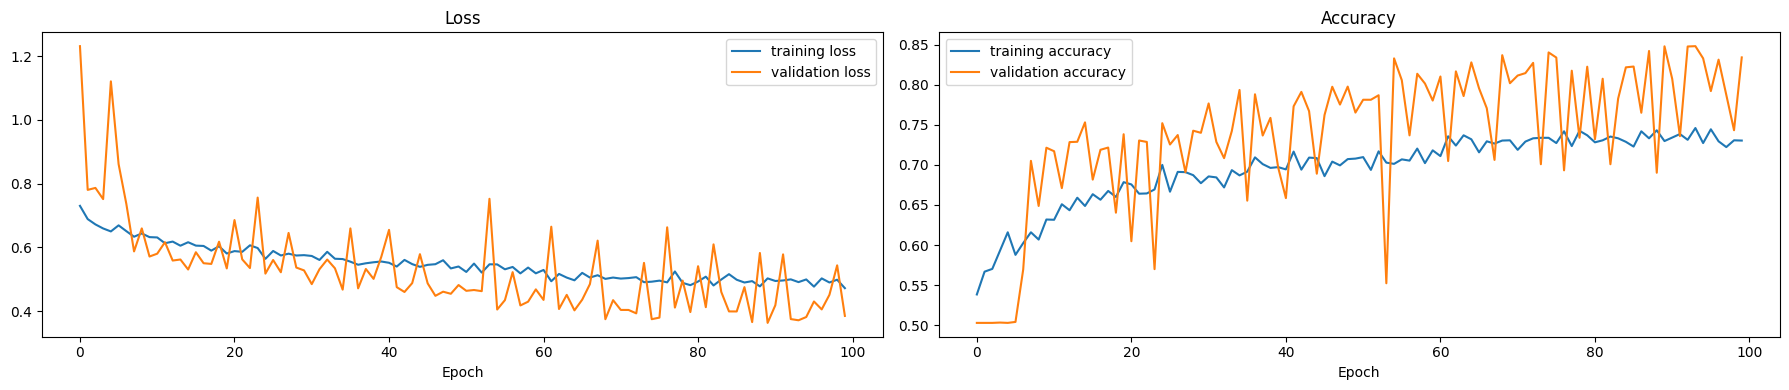

In [38]:
plt.figure(figsize=(18, 4))

plt.subplot(121)
plt.title('Loss')
plt.plot(hist.history['loss'], label='training loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(122)
plt.title('Accuracy')
plt.plot(hist.history['acc'], label='training accuracy')
plt.plot(hist.history['val_acc'], label='validation accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.savefig('Learning rate.png')
plt.show()

# load save model

In [44]:
from keras.models import load_model

best_model = load_model('best_model.h5')

In [45]:
best_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [53]:
pred=best_model.predict(aug_test)

In [54]:
import os
file_names = os.listdir(test_path)
df_test = pd.DataFrame({'Image':file_names})

df_test.sample(5)

,Image
10555,8248.jpg
6316,4432.jpg
4010,2357.jpg
1682,11511.jpg
5285,3504.jpg


In [55]:
aug_test = datagen_valid.flow_from_dataframe(df_test, directory=test_path, x_col='Image',
                                             y_col=None, class_mode=None, target_size= (124, 124),color_mode="grayscale")
           

Found 12500 validated image filenames.


In [56]:
aug_test

In [57]:
import tensorflow as tf

In [58]:
pred = np.where(pred > 0.5, 'Dog', 'Cat')

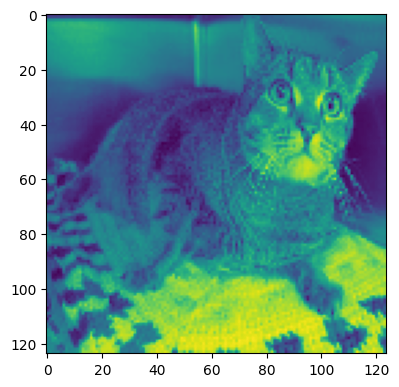

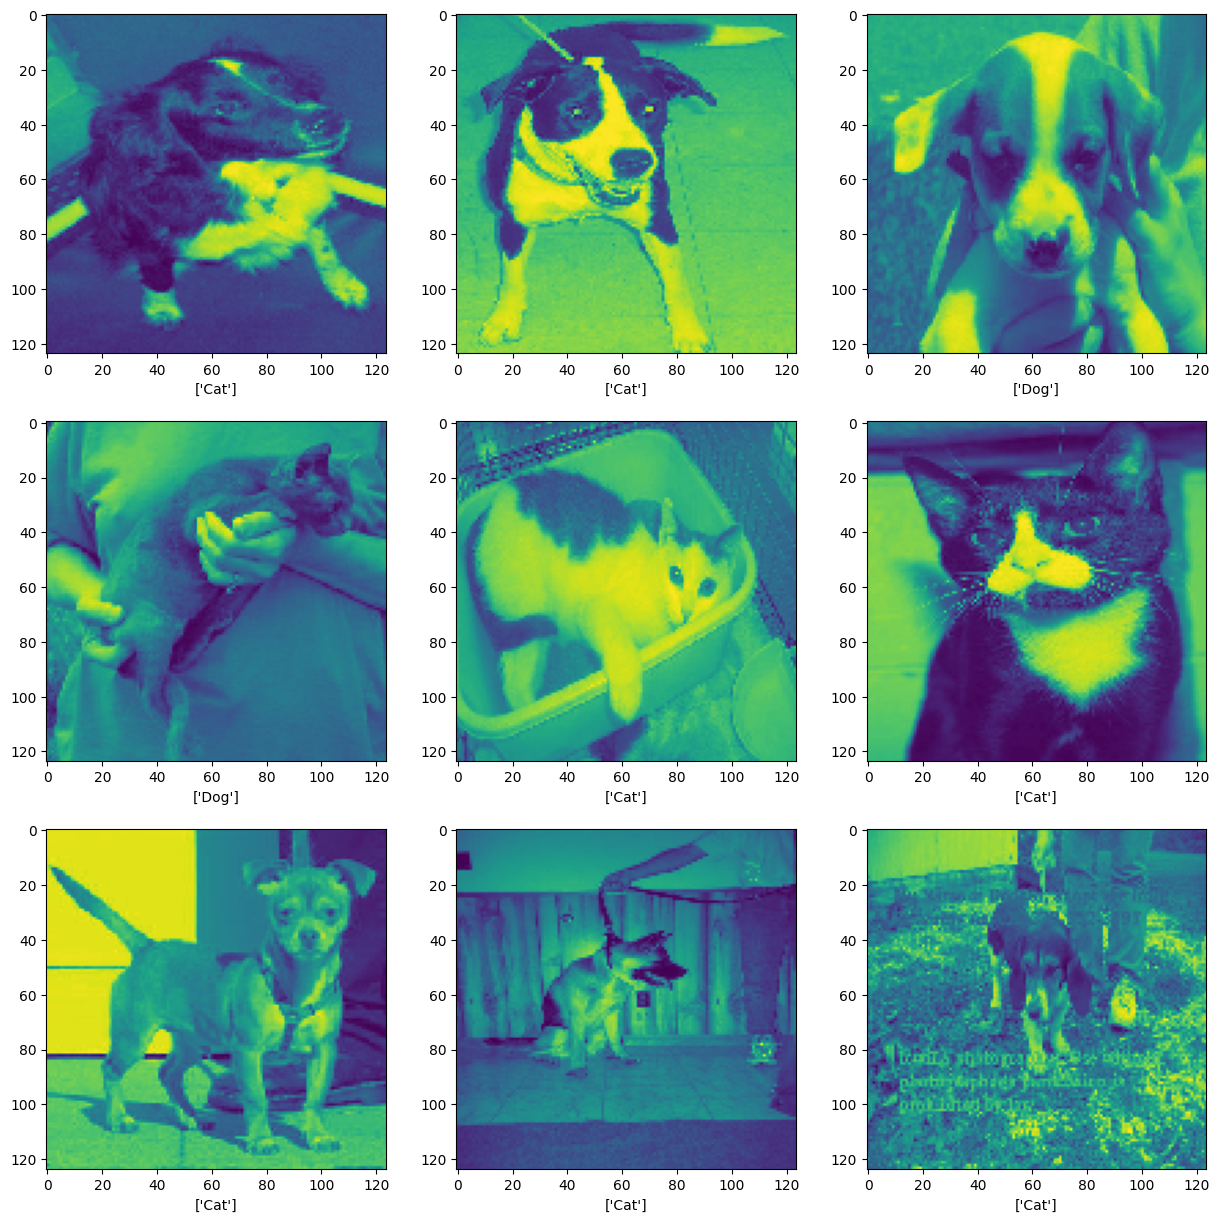

In [59]:
plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(aug_test[0][i])
    plt.xlabel(pred[i])
    
plt.show()

In [60]:
# aug_test[0].shape

(32, 124, 124, 1)

In [61]:
# label = np.where(pred == 'Cat', 0, 1)

In [62]:
# df_submission = pd.read_csv('../input/dogs-vs-cats/sampleSubmission.csv')
# df_submission['label'] = label
# df_submission.to_csv('submission.csv', index=False)

In [68]:
# import cv2
# im = cv2.imread(r"C:\\Users\\Liton\\Deep Learning\\test1\\42.jpg") 
# gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# resized_image = cv2.resize(gray, (124, 124))

# resized_image=resized_image.reshape(124,124,1)

# h1=np.expand_dims(resized_image,axis=0)
# h1=h1/255.0
# plt.show()
# h1.shape

(1, 124, 124, 1)

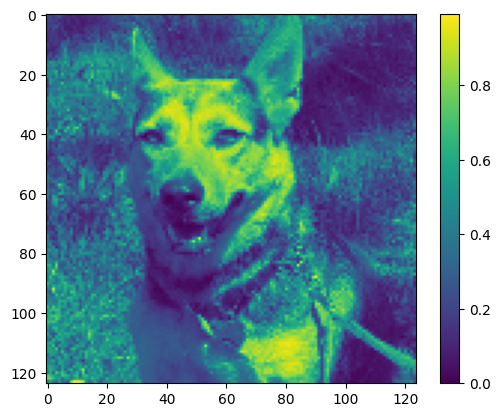

In [69]:
# import matplotlib.pyplot as plt
# plt.figure()
# plt.imshow(h1[0])
# # plt.title(class_names[h[0]])
# plt.colorbar()
# plt.grid(False)
# plt.show()

In [ ]:
# pred2 = np.where(pred1 > 0.5, 'Dog', 'Cat')

In [76]:
# pred2

array([['Dog']], dtype='<U3')

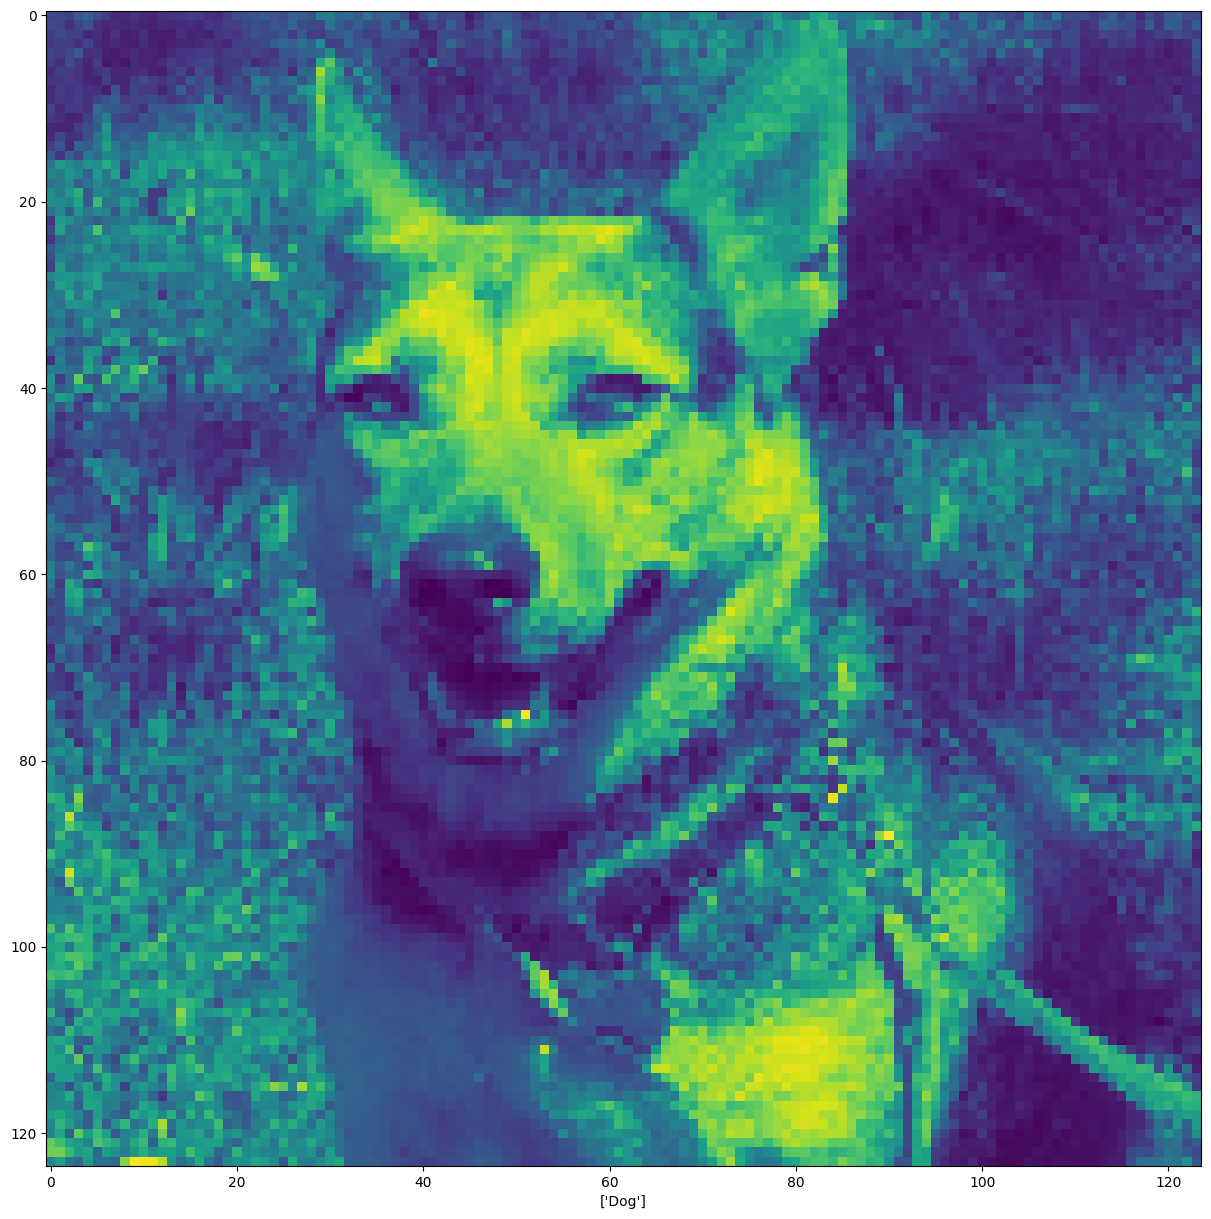

In [77]:
plt.figure(figsize=(15,15))

plt.imshow(h1[0])
plt.xlabel(pred2[0])
    
plt.show()

# Testing Images and flask for deployment

In [16]:
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from PIL import Image
def load_image(img_pa):
    
    img = Image.open(img_pa)
    img = np.array(img)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    resized_image = cv2.resize(gray, (124, 124))

    resized_image=resized_image.reshape(124,124,1)

    h1=np.expand_dims(resized_image,axis=0)
    h1=h1/255.0
    
    plt.figure()

    plt.imshow(h1[0])
    

    plt.show()
    
    best_model = load_model('best_model.h5')
    
    pred=best_model.predict(h1)
    return np.where(pred>0.5,'Dog','Cat')[0][0]



# print(load_image(r"C:\\Users\\Liton\\Deep Learning\\test1\\45.jpg"))



In [17]:

import numpy as np
from flask_ngrok import run_with_ngrok
from flask import Flask,request,jsonify,render_template

In [18]:
import os
tmdir=os.path.abspath('C:\\Users\\Liton\\Desktop\\Portfolio')
app=Flask(__name__,template_folder=tmdir)
# run_with_ngrok(app)

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [09/Sep/2021 23:43:10] "GET / HTTP/1.1" 200 -


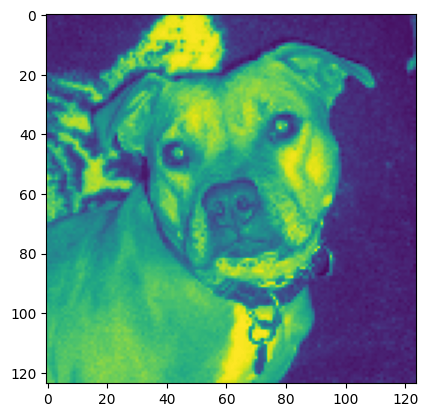

127.0.0.1 - - [09/Sep/2021 23:43:18] "POST /success HTTP/1.1" 200 -


In [19]:
@app.route('/')
def correct():
    return render_template('div.html')


@app.route('/success', methods = ['POST'])  

def success():  
    if request.method == 'POST':  
        f = request.files['file']  
        r=load_image(f)
        
        return render_template("success.html", name = r)  
    
if __name__ == '__main__':  
    app.run()  
